In [16]:
import pandas as pd
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
results_csv = pd.read_csv("Resultados.csv")

In [18]:
results_csv

,Você reside em...,Você tem condições de se alimentar em outro lugar com frequência?,Você acha que se alimenta bem?,Quanto você gasta por refeição quando o bandejão não abre?,Você gosta de comer no bandejão?,Você almoça e janta no bandejão?,Você toma café da manhã no bandejão?,Você almoça no bandejão aos sábados?,Quantas vezes você janta no bandejão por semana?,Quantas vezes você almoça no bandejão por semana?
0,Casa,Sim,Sim,20 a 40 reais,Não,"Não, eu só almoço.",Não,Não,Nenhuma,1 a 3 vezes
1,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,1 a 3 vezes,4 ou 5 vezes
2,Alojamento,Não,Sim,0 a 20 reais,Não,Sim,Sim,Sim,Todos os dias,Todos os dias
3,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,NaN,Todos os dias
4,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,1 a 3 vezes,Todos os dias
5,Casa,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,Todos os dias,Todos os dias
6,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,4 ou 5 vezes,4 ou 5 vezes
7,Apartamento,Sim,Não,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Não,1 a 3 vezes,1 a 3 vezes
8,Apartamento,Não,Não,20 a 40 reais,Sim,Sim,Não,Não,1 a 3 vezes,1 a 3 vezes
9,Apartamento,Não,Sim,20 a 40 reais,Sim,Sim,Sim,Sim,Todos os dias,Todos os dias


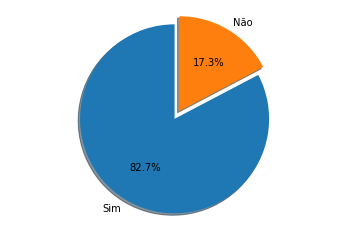

In [42]:
data = results_csv['Você gosta de comer no bandejão?'].value_counts()

labels = 'Sim', 'Não'
sizes = [data[0], data[1]]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()